In [8]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split


In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [6]:
print("cancer data per feature maxima\n{}".format(cancer.data.max(axis=0)))

cancer data per feature maxima
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

[
    mlp.score(X_train, y_train),
    mlp.score(X_test, y_test)
]

[0.9389671361502347, 0.916083916083916]

In [20]:
# nn data should vary in a similar way and have a mean of 0 and variance of 1. let's rescale

# mean value per feature on training set
mean_on_train = X_train.mean(axis=0)
# standard deviation fore ach feature on training set
std_on_train = X_train.std(axis=0)

# subtract the mean and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train

# use the same transform on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

[
    mlp.score(X_train_scaled, y_train),
    mlp.score(X_test_scaled, y_test),
]

/home/renton/anaconda3/envs/DATA/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.9906103286384976, 0.965034965034965]

In [21]:
# increase # of iterations to fix warnings
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

[
    mlp.score(X_train_scaled, y_train),
    mlp.score(X_test_scaled, y_test),
]

[1.0, 0.972027972027972]

In [33]:
# try to improve general performance by raising alpha
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)


[
    mlp.score(X_train_scaled, y_train),
    mlp.score(X_test_scaled, y_test),
]

[0.9882629107981221, 0.972027972027972]

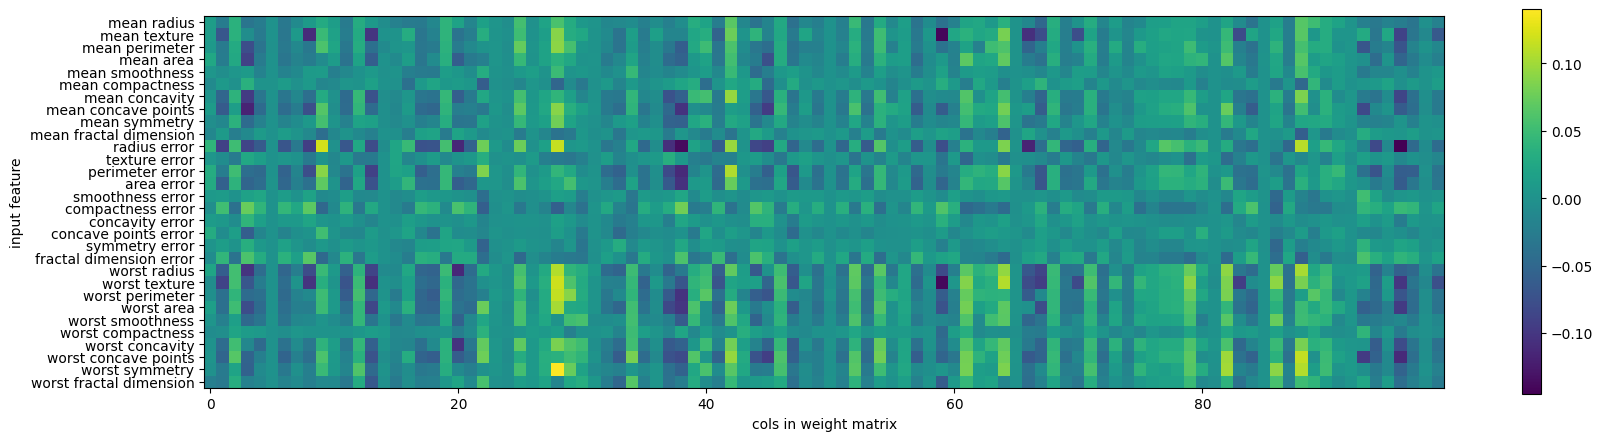

In [36]:
# visualize NN weights from input to first hidden layer
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("cols in weight matrix")
plt.ylabel("input feature")
plt.colorbar()
plt.show()

In [28]:

[
    mlp.coefs_[0],
    mlp.coefs_[1]
]


[array([[ 1.38710846e-02, -2.50121951e-02,  3.66222579e-02, ...,
         -3.47572622e-02, -2.24282383e-03, -1.97638723e-02],
        [ 1.26462143e-02, -6.82790623e-02,  3.70303247e-02, ...,
         -3.34389785e-02, -1.21200193e-02, -6.54680585e-02],
        [ 8.50428302e-03, -2.63297307e-02,  2.95094391e-02, ...,
         -1.72355685e-02,  1.05053722e-03, -1.30428184e-02],
        ...,
        [ 3.01969223e-03, -5.25847578e-02,  6.51799188e-02, ...,
         -4.07129917e-02, -3.25647552e-03, -3.30615217e-02],
        [-1.19219311e-03, -2.78480036e-02,  2.08436140e-02, ...,
         -2.74572097e-02,  5.09456645e-05, -2.03324679e-02],
        [-2.15747657e-02, -2.94202234e-02,  3.25639515e-02, ...,
         -2.14904553e-02, -4.01600447e-03, -2.92891532e-02]],
       shape=(30, 100)),
 array([[-0.09540798],
        [ 0.23756701],
        [-0.19771946],
        [ 0.30384496],
        [ 0.16202467],
        [-0.00111623],
        [ 0.18081763],
        [ 0.08990004],
        [ 0.2707616 ]